In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


In [3]:
import scanpy as sc

# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_L2_repcells_loginv_Harmony_noZ.h5ad')
adata = sc.read_h5ad(dataset_dir / 'PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_L2_repcells_loginv_Harmony_noZ.h5ad')
print(adata.shape)
types = adata.obs['celltype.l2'].unique().tolist()
types = sorted(types)
print(types)

(57515, 27504)
['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']


In [4]:
# Load optimal lambda dict
with open('L2c_k3_opt_lmbd.json') as f:
    opt_lmbd_dict = json.load(f)
opt_lmbd_dict

{'ASDC': 0.0002154434690031884,
 'B_intermediate': 0.0006812920690579617,
 'B_memory': 0.00031622776601683783,
 'B_naive': 0.010000000000000005,
 'CD14_Mono': 0.003162277660168382,
 'CD16_Mono': 0.0021544346900318843,
 'CD4_CTL': 0.00046415888336127795,
 'CD4_Naive': 0.0002154434690031884,
 'CD4_Proliferating': 0.0002154434690031884,
 'CD4_TCM': 0.0006812920690579617,
 'CD4_TEM': 0.0006812920690579617,
 'CD8_Naive': 0.00046415888336127795,
 'CD8_Proliferating': 0.00014677992676220703,
 'CD8_TCM': 0.00046415888336127795,
 'CD8_TEM': 0.0010000000000000002,
 'Doublet': 0.0014677992676220694,
 'Eryth': 0.0021544346900318843,
 'HSPC': 0.0010000000000000002,
 'ILC': 0.00014677992676220703,
 'MAIT': 0.0006812920690579617,
 'NK': 0.006812920690579613,
 'NK_CD56bright': 0.00031622776601683783,
 'NK_Proliferating': 0.00046415888336127795,
 'Plasmablast': 0.0010000000000000002,
 'Platelet': 0.010000000000000005,
 'Treg': 0.00046415888336127795,
 'cDC1': 0.0002154434690031884,
 'cDC2': 0.003162277

In [5]:
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/tuning_result')
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/tuning_result')

loss_dict = {}
for celltype in types:
    tuning_file = f'{celltype}_tuning.json'
    if not os.path.exists(tuning_file):
        print(f"File {tuning_file} does not exist. Skipping to the next cluster.")

    print('====================')
    print(f'Cell type: {celltype}')
    with open(tuning_file) as f:
        tuning = json.load(f)
    tuning = {key: np.array(value) for key, value in tuning.items()}

    loss_dict[celltype] = tuning['loss_history']

Cell type: ASDC
Cell type: B_intermediate
Cell type: B_memory
Cell type: B_naive
Cell type: CD14_Mono
Cell type: CD16_Mono
Cell type: CD4_CTL
Cell type: CD4_Naive
Cell type: CD4_Proliferating
Cell type: CD4_TCM
Cell type: CD4_TEM
Cell type: CD8_Naive
Cell type: CD8_Proliferating
Cell type: CD8_TCM
Cell type: CD8_TEM
Cell type: Doublet
Cell type: Eryth
Cell type: HSPC
Cell type: ILC
Cell type: MAIT
Cell type: NK
Cell type: NK_CD56bright
Cell type: NK_Proliferating
Cell type: Plasmablast
Cell type: Platelet
Cell type: Treg
Cell type: cDC1
Cell type: cDC2
Cell type: dnT
Cell type: gdT
Cell type: pDC


## Plot summary loss vs. lambda

In [6]:
log_lambda_range = tuning['log_lambda_range']
lambda_range = np.exp(log_lambda_range)
lambda_range

array([1.00000000e-05, 1.46779927e-05, 2.15443469e-05, 3.16227766e-05,
       4.64158883e-05, 6.81292069e-05, 1.00000000e-04, 1.46779927e-04,
       2.15443469e-04, 3.16227766e-04, 4.64158883e-04, 6.81292069e-04,
       1.00000000e-03, 1.46779927e-03, 2.15443469e-03, 3.16227766e-03,
       4.64158883e-03, 6.81292069e-03, 1.00000000e-02, 1.46779927e-02,
       2.15443469e-02, 3.16227766e-02, 4.64158883e-02, 6.81292069e-02,
       1.00000000e-01])

In [7]:
colors = adata.uns['celltype.l2_colors']

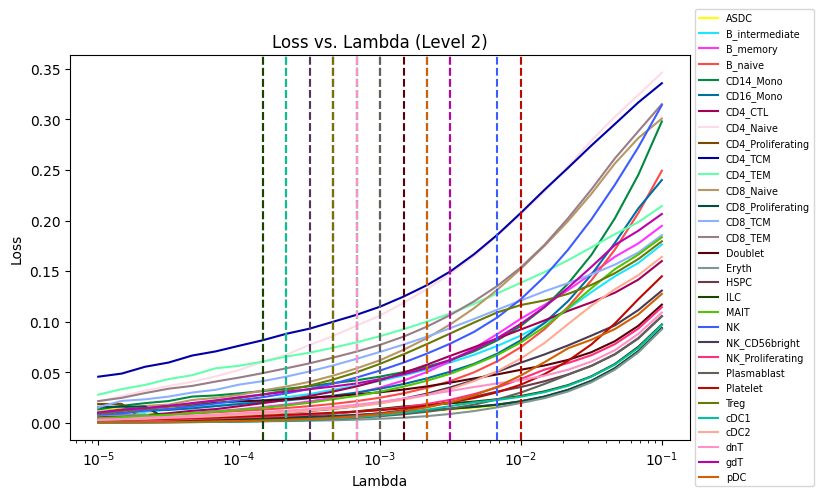

In [8]:
# Plot the loss history against lambda
# colors = plt.cm.tab10.colors

fig, ax = plt.subplots(figsize=(8, 5))

# plot the y-axis values for each key in loss_dict
for i, key in enumerate(loss_dict):
    ax.plot(lambda_range, loss_dict[key], label=key, color=colors[i])

# add vertical dotted lines at the values in opt_lambda_dict
for i, key in enumerate(opt_lmbd_dict):
    ax.axvline(x=opt_lmbd_dict[key], linestyle='--', color=colors[i])

# set the x-axis label
ax.set_xlabel('Lambda')
ax.set_xscale('log')

# set the y-axis label
ax.set_ylabel('Loss')

# add a legend
# ax.legend(loc='upper left')  # , fontsize='x-small'
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')
plt.title('Loss vs. Lambda (Level 2)')

# show the plot
plt.show()